In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# ✅Oficial README.md

Stanford Sentiment Treebank V1.0

This is the dataset of the paper:

Recursive Deep Models for Semantic Compositionality Over a Sentiment Treebank
Richard Socher, Alex Perelygin, Jean Wu, Jason Chuang, Christopher Manning, Andrew Ng and Christopher Potts
Conference on Empirical Methods in Natural Language Processing (EMNLP 2013)

If you use this dataset in your research, please cite the above paper.

@incollection{SocherEtAl2013:RNTN,
title = {{Parsing With Compositional Vector Grammars}},
author = {Richard Socher and Alex Perelygin and Jean Wu and Jason Chuang and Christopher Manning and Andrew Ng and Christopher Potts},
booktitle = {{EMNLP}},
year = {2013}
}

This file includes:
1. original_rt_snippets.txt contains 10,605 processed snippets from the original pool of Rotten Tomatoes HTML files. Please note that some snippet may contain multiple sentences.

2. dictionary.txt contains all phrases and their IDs, separated by a vertical line |

3. sentiment_labels.txt contains all phrase ids and the corresponding sentiment labels, separated by a vertical line.
Note that you can recover the 5 classes by mapping the positivity probability using the following cut-offs:
[0, 0.2], (0.2, 0.4], (0.4, 0.6], (0.6, 0.8], (0.8, 1.0]
for very negative, negative, neutral, positive, very positive, respectively.
Please note that phrase ids and sentence ids are not the same.

4. SOStr.txt and STree.txt encode the structure of the parse trees. 
STree encodes the trees in a parent pointer format. Each line corresponds to each sentence in the datasetSentences.txt file. The Matlab code of this paper will show you how to read this format if you are not familiar with it.

5. datasetSentences.txt contains the sentence index, followed by the sentence string separated by a tab. These are the sentences of the train/dev/test sets.

6. datasetSplit.txt contains the sentence index (corresponding to the index in datasetSentences.txt file) followed by the set label separated by a comma:
	1 = train
	2 = test
	3 = dev

Please note that the datasetSentences.txt file has more sentences/lines than the original_rt_snippet.txt. 
Each row in the latter represents a snippet as shown on RT, whereas the former is each sub sentence as determined by the Stanford parser.

For comparing research and training models, please use the provided train/dev/test splits.

# ✅Collect tonality dataset

In [2]:
DATA_PATH = 'stanfordSentimentTreebank/'

In [3]:
df_sentences = pd.read_csv(os.path.join(DATA_PATH, 'datasetSentences.txt'), sep='\t')
df_dictionary = pd.read_csv(os.path.join(DATA_PATH, 'dictionary.txt'), sep='|', names=['phrase', 'phrase_id'])
df_mapping = pd.read_csv(os.path.join(DATA_PATH, 'datasetSplit.txt'), sep=',')
df_labels = pd.read_csv(os.path.join(DATA_PATH, 'sentiment_labels.txt'), sep='|')
df_labels.columns = ['phrase_id', 'sentiment_values']

df_dictionary_w_labels = pd.merge(df_dictionary, df_labels, on='phrase_id')
df_sentences_w_tonality = pd.merge(df_sentences, df_dictionary_w_labels, left_on='sentence', right_on='phrase', how='inner')
df_sentences_w_tonality_w_split_label = pd.merge(df_sentences_w_tonality, df_mapping, on='sentence_index', how='inner')

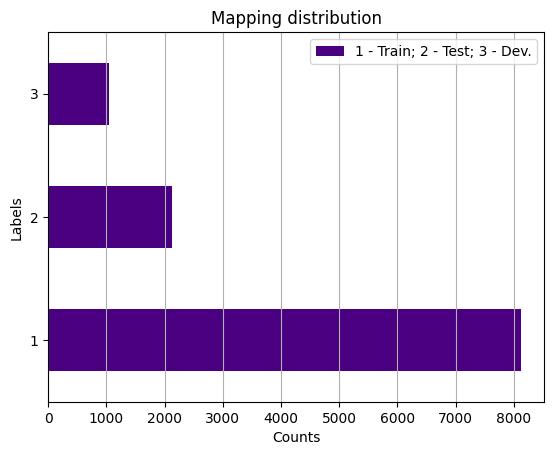

In [4]:
df_sentences_w_tonality_w_split_label['splitset_label']\
                                     .value_counts()\
                                     .plot.barh(
                                         color='indigo',
                                         label='1 - Train; 2 - Test; 3 - Dev.'
                                     )

plt.title('Mapping distribution')
plt.xlabel('Counts')
plt.ylabel('Labels')

plt.grid(axis='x')
plt.legend()
plt.show()

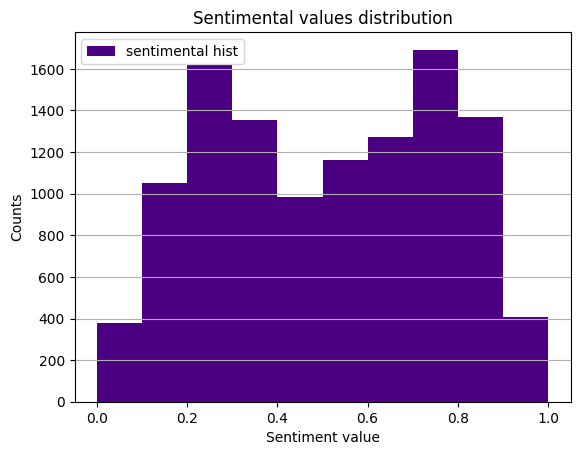

In [5]:
df_sentences_w_tonality_w_split_label['sentiment_values']\
                                     .plot.hist(
                                         color='indigo',
                                         label='sentimental hist'
                                     )

plt.title('Sentimental values distribution')
plt.xlabel('Sentiment value')
plt.ylabel('Counts')

plt.grid(axis='y')
plt.legend()
plt.show()

In [6]:
df_sentences_w_tonality_w_split_label.to_csv('tonality.csv')
df_sentences_w_tonality_w_split_label.to_excel('tonality.xlsx', index=False)
df_sentences_w_tonality_w_split_label.to_pickle('tonality.pkl')